In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph
from pprint import pprint
import random
import numpy as np
import os

# Moves and Keys Associations
moves_to_keys_map = {
    'self_remove_edge_friend':'a',
    'friend_add_edge_friend':'b',
    'self_add_edge_foaf':'c', 
    'friend_add_edge_foaf':'d',
    'foaf_add_edge_foaf':'e',
    'friend_remove_edge_friend':'f',
    'self_add_edge_foafoaf':'g', 
    'friend_add_edge_foafoaf':'h',
    'friend_remove_edge_foaf':'i',
    'foaf_add_edge_foafoaf':'j',
    'foaf_remove_edge_foaf':'k',
    'foaf_remove_edge_foafoaf':'l',
    'add_node_to_self':'m',
    'self_add_edge_any':'n',
    'friend_add_edge_any':'o',
    'foaf_add_edge_any':'p',
    'add_node_to_friend':'q',
    'remove_node_to_self':'r',
    'add_node_to_foaf':'s',
    'remove_node_to_friend':'t',
    'remove_node_to_foaf':'u',
    'any_add_edge_any':'v',
    'any_remove_edge_any':'w',
    'add_node_anywhere':'x',
    'remove_node_anywhere':'y'
}

In [5]:

# Experiment output folder location goes here
# This should be '../output-experiments/<experiment-folder-name>/'
final_experiment_output_path = '../output-experiments/GRAPH_cellular_CENTRALITY_betweenness_DIRECTION_decrease_TIER_10_REACHTYPE_1/'

all_optimal_sequences = []
all_optimal_sequence_budgets = []

for file in os.listdir(final_experiment_output_path):
    if file.endswith(".json"):
        combined_path = final_experiment_output_path + file
        with open(combined_path) as the_file:
            adversarial_sequences = json.load(the_file)
#             print(adversarial_sequences['results'])
            if adversarial_sequences['post_experiment_metrics']['optimal_sequence'] == None:
                continue
            if (adversarial_sequences['configurations']['direction'] == 'increase' and \
                adversarial_sequences['post_experiment_metrics']['outcome_difference'] <= 0) and \
                adversarial_sequences['configurations']['threshold_top_percentile'] > \
                adversarial_sequences['post_experiment_metrics']['ending_percentile'] or \
               (adversarial_sequences['configurations']['direction'] == 'decrease' and \
                adversarial_sequences['post_experiment_metrics']['outcome_difference'] >= 0) and \
                adversarial_sequences['configurations']['threshold_top_percentile'] < \
                adversarial_sequences['post_experiment_metrics']['ending_percentile']:
                continue
            else:
                all_optimal_sequences.append(adversarial_sequences['post_experiment_metrics']['optimal_sequence']['details'])
                all_optimal_sequence_budgets.append(adversarial_sequences['pre_experiment_metrics']['budget_selected_for_experiment'])
            
    else:
        continue

        
adv_tuples = tuple(zip(all_optimal_sequences, all_optimal_sequence_budgets))
# print(adv_tuples)

print('Adversarial Moves')
for optimal_seq in adv_tuples:
    print(optimal_seq)
print('\n')

print('Direction')
print(adversarial_sequences['configurations']['direction'])
print('\n')

print('Eval_metric')
print(adversarial_sequences['configurations']['eval_metric'])
print('\n')

print('Node Tier')
print(adversarial_sequences['configurations']['specific_tier_selected'])
print('\n')

print('Graph Type')
print(adversarial_sequences['configurations']['graph_type'])
print('\n')


Adversarial Moves
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['remove_node_to_self'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['remove_node_to_self'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['remove_node_to_self'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['remove_node_to_self'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_remove_edge_friend'], 1)
(['self_

In [6]:
# abbreviating and encoding moves
coded_moves = []

for optimal_seq in all_optimal_sequences:
    move_label = ''
    for step in optimal_seq:
        move_label += moves_to_keys_map[step]

    coded_moves.append(move_label)
        
print(coded_moves)

['a', 'a', 'r', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'r', 'a', 'a', 'r', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'r', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'r', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'r', 'a', 'r', 'r', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'r', 'a', 'r', 'a', 'a', 'r', 'a', 'a', 'a', 'a', 'a', 'a', 'r', 'a', 'r', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'r', 'r', 'a', 'a', 'a', 'r', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']


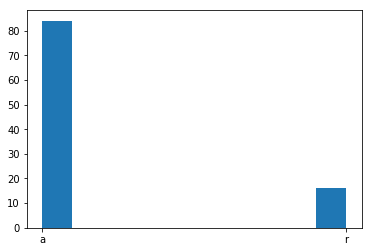

In [7]:
# plotting results
plt.hist(coded_moves) 
plt.show()